In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumes = pd.read_csv('input/data.csv' ,encoding='utf-8')
resumes['Cleaned resume'] = ''
resumes.head()

,Category,Resume,Cleaned resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [4]:
print (resumes['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [5]:
print (resumes['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


In [6]:
import re
def clean_data(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('exprience', 'experience',text)
    text = " ".join(text.split())  # remove extra whitespace
    return text

In [7]:
resumes['Cleaned resume'] = resumes.Resume.apply(lambda text: clean_data(text))
resumes.head()

,Category,Resume,Cleaned resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [8]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacopo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
tokenized_text = []
cleaned_resumes = ""

for resume in resumes['Resume'].values:
    cleaned_resume = clean_data(resume)
    cleaned_resumes += cleaned_resume
    tokenized_text.extend(nltk.word_tokenize(cleaned_resume))

tokenized_text

['skills',
 'programming',
 'languages',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'sql',
 'java',
 'javascript',
 'jquery',
 'machine',
 'learning',
 'regression',
 'svm',
 'na',
 've',
 'bayes',
 'knn',
 'random',
 'forest',
 'decision',
 'trees',
 'boosting',
 'techniques',
 'cluster',
 'analysis',
 'word',
 'embedding',
 'sentiment',
 'analysis',
 'natural',
 'language',
 'processing',
 'dimensionality',
 'reduction',
 'topic',
 'modelling',
 'lda',
 'nmf',
 'pca',
 'neural',
 'nets',
 'database',
 'visualizations',
 'mysql',
 'sqlserver',
 'cassandra',
 'hbase',
 'elasticsearch',
 'd3',
 'js',
 'dc',
 'js',
 'plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'tableau',
 'others',
 'regular',
 'expression',
 'html',
 'css',
 'angular',
 '6',
 'logstash',
 'kafka',
 'python',
 'flask',
 'git',
 'docker',
 'computer',
 'vision',
 'open',
 'cv',
 'and',
 'understanding',
 'of',
 'deep',
 'learning',
 'education',
 'details',
 'data',
 'science',
 'ass

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_en = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacopo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
tokenized_text_filtered = []
for token in tokenized_text:
    if token not in stopwords_en:
        tokenized_text_filtered.append(token)

tokenized_text_filtered

['skills',
 'programming',
 'languages',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'sql',
 'java',
 'javascript',
 'jquery',
 'machine',
 'learning',
 'regression',
 'svm',
 'na',
 'bayes',
 'knn',
 'random',
 'forest',
 'decision',
 'trees',
 'boosting',
 'techniques',
 'cluster',
 'analysis',
 'word',
 'embedding',
 'sentiment',
 'analysis',
 'natural',
 'language',
 'processing',
 'dimensionality',
 'reduction',
 'topic',
 'modelling',
 'lda',
 'nmf',
 'pca',
 'neural',
 'nets',
 'database',
 'visualizations',
 'mysql',
 'sqlserver',
 'cassandra',
 'hbase',
 'elasticsearch',
 'd3',
 'js',
 'dc',
 'js',
 'plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'tableau',
 'others',
 'regular',
 'expression',
 'html',
 'css',
 'angular',
 '6',
 'logstash',
 'kafka',
 'python',
 'flask',
 'git',
 'docker',
 'computer',
 'vision',
 'open',
 'cv',
 'understanding',
 'deep',
 'learning',
 'education',
 'details',
 'data',
 'science',
 'assurance',
 'associate',

In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jacopo/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
pos_tagging = nltk.pos_tag(tokenized_text_filtered)
pos_tagging

[('skills', 'NNS'),
 ('programming', 'VBG'),
 ('languages', 'NNS'),
 ('python', 'VBP'),
 ('pandas', 'JJ'),
 ('numpy', 'JJ'),
 ('scipy', 'NN'),
 ('scikit', 'NN'),
 ('learn', 'VBP'),
 ('matplotlib', 'NN'),
 ('sql', 'NN'),
 ('java', 'NN'),
 ('javascript', 'NN'),
 ('jquery', 'NN'),
 ('machine', 'NN'),
 ('learning', 'VBG'),
 ('regression', 'NN'),
 ('svm', 'NN'),
 ('na', 'TO'),
 ('bayes', 'VB'),
 ('knn', 'JJ'),
 ('random', 'JJ'),
 ('forest', 'JJS'),
 ('decision', 'NN'),
 ('trees', 'NNS'),
 ('boosting', 'VBG'),
 ('techniques', 'NNS'),
 ('cluster', 'NN'),
 ('analysis', 'NN'),
 ('word', 'NN'),
 ('embedding', 'VBG'),
 ('sentiment', 'NN'),
 ('analysis', 'NN'),
 ('natural', 'JJ'),
 ('language', 'NN'),
 ('processing', 'NN'),
 ('dimensionality', 'NN'),
 ('reduction', 'NN'),
 ('topic', 'NN'),
 ('modelling', 'VBG'),
 ('lda', 'JJ'),
 ('nmf', 'JJ'),
 ('pca', 'NN'),
 ('neural', 'JJ'),
 ('nets', 'NNS'),
 ('database', 'VBP'),
 ('visualizations', 'NNS'),
 ('mysql', 'VBP'),
 ('sqlserver', 'RB'),
 ('cassandra

In [14]:
def simpler_pos_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return "a"
    elif nltk_tag.startswith('V'):
        return "v"
    elif nltk_tag.startswith('N'):
        return "n"
    elif nltk_tag.startswith('R'):
        return "r"
    else:
        return None

simpler_POS_text = []

# for each tuple of the list, we create a new tuple: the first element is the token, the second is
# the simplified pos tag, obtained calling the function simpler_pos_tag()
# then we append the new created tuple to a new list, which will be the output
for tuple in pos_tagging:
    POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
    simpler_POS_text.append(POS_tuple)

simpler_POS_text

[('skills', 'n'),
 ('programming', 'v'),
 ('languages', 'n'),
 ('python', 'v'),
 ('pandas', 'a'),
 ('numpy', 'a'),
 ('scipy', 'n'),
 ('scikit', 'n'),
 ('learn', 'v'),
 ('matplotlib', 'n'),
 ('sql', 'n'),
 ('java', 'n'),
 ('javascript', 'n'),
 ('jquery', 'n'),
 ('machine', 'n'),
 ('learning', 'v'),
 ('regression', 'n'),
 ('svm', 'n'),
 ('na', None),
 ('bayes', 'v'),
 ('knn', 'a'),
 ('random', 'a'),
 ('forest', 'a'),
 ('decision', 'n'),
 ('trees', 'n'),
 ('boosting', 'v'),
 ('techniques', 'n'),
 ('cluster', 'n'),
 ('analysis', 'n'),
 ('word', 'n'),
 ('embedding', 'v'),
 ('sentiment', 'n'),
 ('analysis', 'n'),
 ('natural', 'a'),
 ('language', 'n'),
 ('processing', 'n'),
 ('dimensionality', 'n'),
 ('reduction', 'n'),
 ('topic', 'n'),
 ('modelling', 'v'),
 ('lda', 'a'),
 ('nmf', 'a'),
 ('pca', 'n'),
 ('neural', 'a'),
 ('nets', 'n'),
 ('database', 'v'),
 ('visualizations', 'n'),
 ('mysql', 'v'),
 ('sqlserver', 'r'),
 ('cassandra', 'a'),
 ('hbase', 'n'),
 ('elasticsearch', 'n'),
 ('d3', 'n'),

In [15]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/jacopo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
lemmatized_text = []

for tuple in simpler_POS_text:
    if tuple[1] == None:
        lemmatized_text.append(lemmatizer.lemmatize(tuple[0]))
    else:
        lemmatized_text.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))

lemmatized_text

['skill',
 'program',
 'language',
 'python',
 'pandas',
 'numpy',
 'scipy',
 'scikit',
 'learn',
 'matplotlib',
 'sql',
 'java',
 'javascript',
 'jquery',
 'machine',
 'learn',
 'regression',
 'svm',
 'na',
 'bay',
 'knn',
 'random',
 'forest',
 'decision',
 'tree',
 'boost',
 'technique',
 'cluster',
 'analysis',
 'word',
 'embed',
 'sentiment',
 'analysis',
 'natural',
 'language',
 'processing',
 'dimensionality',
 'reduction',
 'topic',
 'model',
 'lda',
 'nmf',
 'pca',
 'neural',
 'net',
 'database',
 'visualization',
 'mysql',
 'sqlserver',
 'cassandra',
 'hbase',
 'elasticsearch',
 'd3',
 'j',
 'dc',
 'j',
 'plotly',
 'kibana',
 'matplotlib',
 'ggplot',
 'tableau',
 'others',
 'regular',
 'expression',
 'html',
 'cs',
 'angular',
 '6',
 'logstash',
 'kafka',
 'python',
 'flask',
 'git',
 'docker',
 'computer',
 'vision',
 'open',
 'cv',
 'understand',
 'deep',
 'learning',
 'education',
 'detail',
 'data',
 'science',
 'assurance',
 'associate',
 'data',
 'science',
 'assurance

In [17]:
word_frequency_distribution = nltk.FreqDist(lemmatized_text)
most_common = word_frequency_distribution.most_common(50)
print(most_common)

[('experience', 4421), ('project', 4071), ('company', 3639), ('month', 3344), ('detail', 3179), ('description', 3122), ('test', 2625), ('work', 2355), ('1', 2162), ('data', 2156), ('team', 2156), ('management', 2024), ('skill', 2000), ('system', 1954), ('use', 1841), ('report', 1545), ('6', 1499), ('year', 1499), ('client', 1472), ('maharashtra', 1449), ('database', 1423), ('service', 1396), ('application', 1394), ('technology', 1370), ('process', 1324), ('requirement', 1274), ('business', 1273), ('design', 1243), ('development', 1204), ('developer', 1200), ('server', 1196), ('customer', 1182), ('ltd', 1177), ('sql', 1120), ('responsibility', 1103), ('january', 1090), ('develop', 1083), ('java', 1076), ('engineering', 1055), ('pune', 1026), ('provide', 953), ('c', 922), ('create', 919), ('user', 916), ('manage', 900), ('operation', 895), ('software', 893), ('role', 892), ('ensure', 890), ('pvt', 879)]


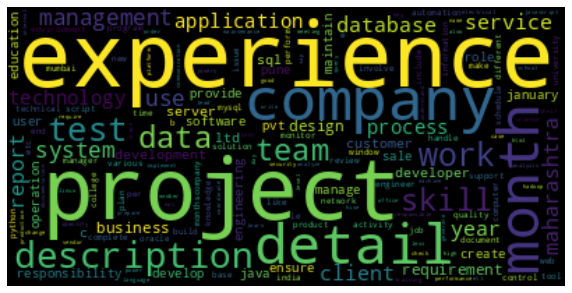

In [18]:
word_cloud = WordCloud(collocations=False, stopwords=stopwords_en).generate(" ".join(lemmatized_text))
plt.figure(figsize=(10,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
cleaned_resumes_category = {}
tokenized_text_category = {}

categories = resumes['Category'].unique()

for category in categories:
    cleaned_resumes_category[category] = ""
    tokenized_text_category[category] = []

In [20]:
for resume in resumes.values:
    cleaned_resume = clean_data(resume[1])
    tokenized_text = nltk.word_tokenize(cleaned_resume)
    for token in tokenized_text:
        if token not in stopwords_en:
            tokenized_text_category[resume[0]].append(token)

pos_tagging_category = {}

for category in categories:
    pos_tagging_category[category] = nltk.pos_tag(tokenized_text_category[category])


simpler_POS_text_category = {}

# for each tuple of the list, we create a new tuple: the first element is the token, the second is
# the simplified pos tag, obtained calling the function simpler_pos_tag()
# then we append the new created tuple to a new list, which will be the output
for category in categories:
    simpler_POS_text_category[category] = []
    for tuple in pos_tagging_category[category]:
        POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
        simpler_POS_text_category[category].append(POS_tuple)

lemmatized_text_category = {}

for category in categories:
    lemmatized_text_category[category] = []
    for tuple in simpler_POS_text_category[category]:
        if tuple[1] == None:
            lemmatized_text_category[category].append(lemmatizer.lemmatize(tuple[0]))
        else:
            lemmatized_text_category[category].append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))

lemmatized_text_category

{'Data Science': ['skill',
  'program',
  'language',
  'python',
  'pandas',
  'numpy',
  'scipy',
  'scikit',
  'learn',
  'matplotlib',
  'sql',
  'java',
  'javascript',
  'jquery',
  'machine',
  'learn',
  'regression',
  'svm',
  'na',
  'bay',
  'knn',
  'random',
  'forest',
  'decision',
  'tree',
  'boost',
  'technique',
  'cluster',
  'analysis',
  'word',
  'embed',
  'sentiment',
  'analysis',
  'natural',
  'language',
  'processing',
  'dimensionality',
  'reduction',
  'topic',
  'model',
  'lda',
  'nmf',
  'pca',
  'neural',
  'net',
  'database',
  'visualization',
  'mysql',
  'sqlserver',
  'cassandra',
  'hbase',
  'elasticsearch',
  'd3',
  'j',
  'dc',
  'j',
  'plotly',
  'kibana',
  'matplotlib',
  'ggplot',
  'tableau',
  'others',
  'regular',
  'expression',
  'html',
  'cs',
  'angular',
  '6',
  'logstash',
  'kafka',
  'python',
  'flask',
  'git',
  'docker',
  'computer',
  'vision',
  'open',
  'cv',
  'understand',
  'deep',
  'learning',
  'educat

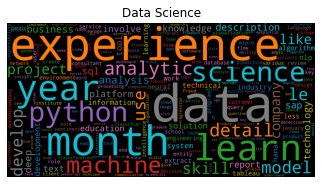

In [31]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    word_cloud = WordCloud(collocations=False, stopwords=stopwords_en, height=2000, width=4000, colormap='tab10_r').generate(" ".join(lemmatized_text_category[category]))
    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(word_cloud)
    plt.axis('off')
    break

plt.show()
plt.close()

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
resumes['Category'] = label_encoder.fit_transform(resumes['Category'])
resumes.head()

,Category,Resume,Cleaned resume
0,6,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,education details may 2013 to may 2017 b e uit...
2,6,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


In [80]:
def clean(text):
    text = clean_data(text)
    tokens = nltk.word_tokenize(text)
    tokens_filtered = []
    for token in tokens:
        if token not in stopwords_en:
            tokens_filtered.append(token)

    pos_tagging = nltk.pos_tag(tokens_filtered)

    simpler_POS_text = []

    for tuple in pos_tagging:
        POS_tuple = (tuple[0], simpler_pos_tag(tuple[1]))
        simpler_POS_text.append(POS_tuple)

    lemmatized_text = []

    for tuple in simpler_POS_text:
        if tuple[1] == None:
            lemmatized_text.append(lemmatizer.lemmatize(tuple[0]))
        else:
            lemmatized_text.append(lemmatizer.lemmatize(tuple[0], pos=tuple[1]))

    return lemmatized_text

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

labels = resumes['Category']

word_vectorizer = TfidfVectorizer(analyzer=clean)
word_vectorizer.fit(resumes['Resume'])
vectorized_resumes = word_vectorizer.transform(resumes['Resume'])

X_train,X_test,y_train,y_test = train_test_split(vectorized_resumes,labels,random_state=42, test_size=0.8,shuffle=True, stratify=labels)
print(X_train.shape)
print(X_test.shape)

(192, 6338)
(770, 6338)


In [96]:
from sklearn.ensemble import RandomForestClassifier

clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     0.90
